Con uso de la libreria de `pandas`, importamos la base de datos `A1.5 Calificaciones` para continar con nuestro analisis. A continuacion se muestran los tipos de datos de cada variable dentro de nuestro DataFrame.

In [42]:
import pandas as pd
df = pd.read_csv("A1.5 Calificaciones.csv")

print("Tipo de dato de cada variable:\n",df.dtypes)

Tipo de dato de cada variable:
 Escuela           object
Sexo              object
Edad               int64
HorasDeEstudio     int64
Reprobadas         int64
Internet          object
Faltas             int64
G1                 int64
G2                 int64
G3                 int64
dtype: object


En este caso usaremos la funcion `where` que funciona como en SQL, es decir, buscamos que se cumpla algún parámetro, en este caso que el tipo de dato sea `object` (este tipo de dato es como un string donde puede haber tanto letras como números) y guardamos el índice de las variables con este tipo de dato. Después, con un `for` para cada variable, creamos un dummy que simule las opciones dentro de la variable original y lo convertimos en una variable booleana que nos dirá si pertenece o no a una categoría. Como crear una variable para cada opción sería repetitivo, quitamos la primera columna con `drop_first`. Por ejemplo, si tenemos hombre y mujer, borramos la parte de hombre y dejamos mujer; si es 1, es mujer, y si es 0, podemos inferir que es hombre. Luego añadimos estas nuevas variables a nuestro DataFrame y lo imprimimos. Además, a pesar de que la variable HorasDeEstudio es de tipo entero, esta representa una clasificación entre categorías, es decir, es una variable de tipo cualitativo, por lo que también debe separarse. De esta forma transformamos todas las variables categóricas para que los nuevos datos sean útiles en un modelo de regresión lineal múltiple. Se debe prestar especial atención a las variables que, aunque parecen cuantitativas (contienen números), en realidad son cualitativas (los números representan una clase). Finalmente, se imprimen las primeras 5 observaciones de la base de datos modificada para demostrar que las variables cualitativas desaparecieron y fueron reemplazadas por variables adecuadas.

In [43]:
# Where funciona como en SQL digamos, donde buscamos que cumpla con algun parametro, este caso, que el tipo de dato sea object 
# (este tipo de dato es como un string donde puede haber tanto letras como numeros) y guardamos el indice de las variables con este tipo de dato
# despues con un for para cada variable, creamos un `dummy` que simule las opciones dentro de la variable que teniamos y ahora lo volvemos una variable
# booleana que nos dira si es o no alguna categoria, como crear una variable para cada opcioon seria repetitivo, quitamos la primera columna con el 
# `drop_first`. Digamos, si tengo hombre y muejer, borro la parte de hombre y dejamos mujer, si es 1, es mujer evidentemente, pero si es 0, podemos
# inferir que es hombre. Despues añaadimos estas nuevas variables a nuestro Dataframe y lo imprimimos.
# Tambien, a pesar de que la variable HorasDeEstudio es de tipo entero, esta representa una clasificacion entre categorias, o sea, es una variable
# de tipo cualitativo, por lo que tambien debe separarse

import numpy as np

ind = np.where(df.dtypes==object)

for i in ind:
    dummy = pd.get_dummies(df.iloc[:,i], drop_first = True)
    df = pd.concat([df, dummy], axis = 1)

df = df.drop(labels = df.columns[ind], axis = 1)

dummyEstudio = pd.get_dummies(df.HorasDeEstudio, drop_first = True)

df = pd.concat([df, dummyEstudio], axis = 1)

df = df.drop("HorasDeEstudio", axis = 1)

df.head()

,Edad,Reprobadas,Faltas,G1,G2,G3,Escuela_MS,Sexo_M,Internet_yes,2,3,4
0,18,0,6,5,6,6,False,False,False,True,False,False
1,17,0,4,5,5,6,False,False,True,True,False,False
2,15,3,10,7,8,10,False,False,True,True,False,False
3,15,0,2,15,14,15,False,False,True,False,True,False
4,16,0,4,6,10,10,False,False,False,True,False,False


Primero se calcula el cuartil uno y el cuartil tres de la variable **Faltas** con `df.Faltas.quantile(0.25)` y `df.Faltas.quantile(0.75)`. A partir de estos valores se obtiene el rango intercuartil (IQR) como la diferencia entre Q3 y Q1. Luego, se determinan los límites inferior y superior utilizando la fórmula `q1 - (3 * iqr)` para el límite inferior y `q1 + (3 * iqr)` para el límite superior. Con `where` se identifican los índices de las observaciones que están fuera de estos límites (outliers). Posteriormente, se convierte todo el DataFrame a tipo entero con `df.astype(int)`, ya que para la función del heatmap los valores booleanos no eran leídos como 0 y 1 sino como True y False, por lo que se decidió cambiar todo a enteros de una vez. Finalmente, se imprimen en consola las filas correspondientes a los outliers y se muestran los tipos de datos de cada variable.


In [44]:
# Cuartil uno
q1 = df.Faltas.quantile(0.25)

# Cuartil tres
q3 = df.Faltas.quantile(0.75)

# Rango intercuartil
iqr = q3 - q1

# Límite inferior
li = q1 - (3*iqr)

# Límite superior
ls = q1 + (3*iqr)

# Observaciones fuera de cualquiera de los dos límites
out=np.where((df.Faltas<=li) | (df.Faltas>=ls))[0]

# Imprimir información de outliers
# AQUI TENGO DUDA POR QUE LA FUNCION PARA EL HEATMAP NO LEE LOS BOOL COMO 0 Y 1 SI NO COMO TRUE Y FALSE, ASI QUE 
# HIZO FALTA CAMBIAR TODO A INT DE UNA, QUE AL CABO YA ESTABA TODO EN INT
df = df.astype(int)

print(df.iloc[out,:])


     Edad  Reprobadas  Faltas  G1  G2  G3  Escuela_MS  Sexo_M  Internet_yes  \
40     16           1      25   7  10  11           0       0             1   
74     16           0      54  11  12  11           0       0             1   
103    15           0      26   7   6   6           0       0             1   
183    17           0      56   9   9   8           0       0             1   
198    17           1      24  18  18  18           0       0             1   
205    17           1      28  10   9   9           0       0             1   
276    18           0      75  10   9   9           0       0             1   
280    17           0      30   8   8   8           0       1             1   
307    19           1      38   8   9   8           0       1             1   
315    19           1      40  13  11  11           0       0             1   

     2  3  4  
40   1  0  0  
74   1  0  0  
103  1  0  0  
183  1  0  0  
198  0  0  0  
205  0  1  0  
276  1  0  0  
280  0  0 

Para la variable de `Faltas`, vemos que hay valores atipicos al usar el metodo de Tukey con k=3. Estos datos no necesariamente son errores, pero si son datos muy alejados de las demas muestras. En lugar de eliminar estas observaciones, decidimos reemplazarlas por la mediana, ya que este valor representa mejor el comportamiento central de la mayoría de los estudiantes y no se ve afectado por valores extremos, a diferencia de la media, por ejemplo. Ahora, en lugar de tener valores tan altos, simplemente tendremos el valor que se encuentre mas en el centro de todos los datos posibles.

In [45]:
mediana = df['Faltas'].median()
df.loc[out, 'Faltas'] = mediana
print(df.iloc[out, :])

     Edad  Reprobadas  Faltas  G1  G2  G3  Escuela_MS  Sexo_M  Internet_yes  \
40     16           1       4   7  10  11           0       0             1   
74     16           0       4  11  12  11           0       0             1   
103    15           0       4   7   6   6           0       0             1   
183    17           0       4   9   9   8           0       0             1   
198    17           1       4  18  18  18           0       0             1   
205    17           1       4  10   9   9           0       0             1   
276    18           0       4  10   9   9           0       0             1   
280    17           0       4   8   8   8           0       1             1   
307    19           1       4   8   9   8           0       1             1   
315    19           1       4  13  11  11           0       0             1   

     2  3  4  
40   1  0  0  
74   1  0  0  
103  1  0  0  
183  1  0  0  
198  0  0  0  
205  0  1  0  
276  1  0  0  
280  0  0 

Ahora se genera una matriz de correlaciones para encontrar potenciales problemas de colinealidad. Genera un heatmap para visualizar de forma más sencilla los resultados. Determina si es necesario eliminar una o múltiples variables, explicando tu razonamiento en una línea de texto. Realiza la acción descrita en caso de ser necesario. Posteriormente se llena la diagonal donde se compara la variable consigo misma , lo que nos daria un 1, asi que lo llenamos con ceros con y se obtienen los índices `(i, j)` de la posición del valor máximo. Se imprimen los índices y el valor de la correlación máxima. Luego se importa la función heatmap de la librería seaborn mediante `from seaborn import heatmap` y finalmente se grafica el heatmap con `heatmap(cor)`.


Indices: 4 5
Valor de correlacion: 0.904867989269301


<Axes: >

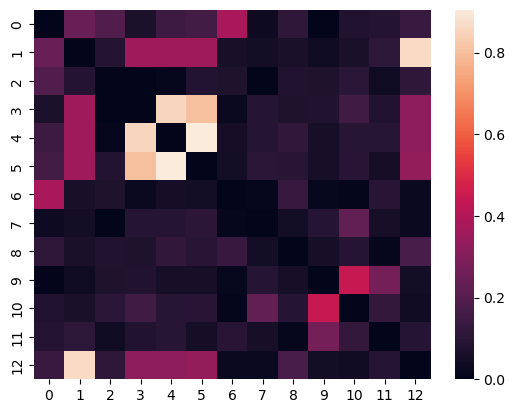

In [49]:
from seaborn import heatmap

cor =  abs(np.corrcoef(df, rowvar = False))

np.fill_diagonal(cor,0)

i,j=np.unravel_index(cor.argmax(),cor.shape)

print("Indices:",i,j)

print("Valor de correlacion:",cor[i,j])

heatmap(cor)

Ahora se incluye una nueva variable que sera una interaccion entre las variables de Internet_yes y Reprobadas, generando la nueva variable “Internet_Reprobadas”, que multiplica ambas columnas. Esto para ver si en realidad el hecho de tener internet y el número de materias reprobadas pueden influir juntos en el rendimiento académico. Y por ultimo mostramos las observaciones con esta nueva variable.

In [47]:
df['Internet_Reprobadas'] = df['Internet_yes'] * df['Reprobadas']

print(df)

     Edad  Reprobadas  Faltas  G1  G2  G3  Escuela_MS  Sexo_M  Internet_yes  \
0      18           0       6   5   6   6           0       0             0   
1      17           0       4   5   5   6           0       0             1   
2      15           3      10   7   8  10           0       0             1   
3      15           0       2  15  14  15           0       0             1   
4      16           0       4   6  10  10           0       0             0   
..    ...         ...     ...  ..  ..  ..         ...     ...           ...   
390    20           2      11   9   9   9           1       1             0   
391    17           0       3  14  16  16           1       1             1   
392    21           3       3  10   8   7           1       1             0   
393    18           0       0  11  12  10           1       1             1   
394    19           0       5   8   9   9           1       1             1   

     2  3  4  Internet_Reprobadas  
0    1  0  0   

Ahora se entrena un modelo de regresión lineal múltiple utilizando un subconjunto del 80% de los datos para entrenamiento y el 20% restante para prueba. Se separan las variables predictoras (X) de la variable de respuesta (G3), y se añade una constante para incluir el término independiente en el modelo. Se utiliza la función OLS de la librería statsmodels para ajustar el modelo y se imprime un resumen con las estadísticas obtenidas. Despues se hace la predicción de las calificaciones finales en los datos de prueba y se grafica para comparar los valores reales con los estimados por el modelo. La línea roja sirve como referencia donde el ajuste estimado por el modelo es exactamente igual al real. Donde a simplevista podemos ver que los datos estimados tienen cierto apego a los datos reales, ademas, junto al valor de la R cuadrada ajustada, podemos ver que el modelo se ajusta con un 82% de confiabilidad. Sin embargo, viendo los valores de p, podemos ver que son pocas las variables que son realmente significativas donde se peuden observar  la de `Edad`, `Faltas`y `G2` al ser las unicas que tienen un valor igual o menor a 0.05.

Train: (316, 13)
Test: (79, 13)
                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     125.0
Date:                Wed, 27 Aug 2025   Prob (F-statistic):          1.34e-109
Time:                        19:10:08   Log-Likelihood:                -649.06
No. Observations:                 316   AIC:                             1324.
Df Residuals:                     303   BIC:                             1373.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
co

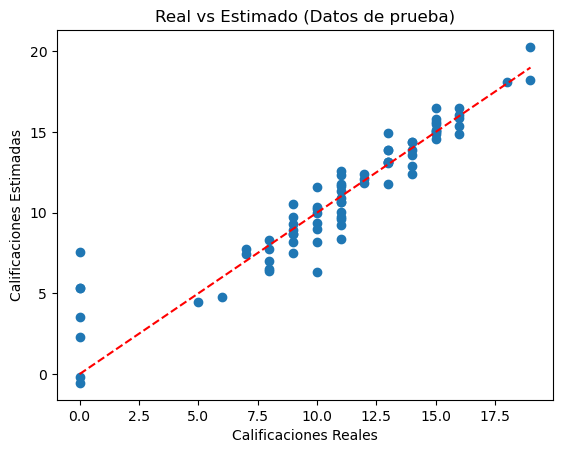

In [48]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

train = df.sample(frac=0.8, random_state=91)
test = df.drop(train.index)                 

print("Train:",train.shape)
print("Test:",test.shape)

X_train = train.drop('G3', axis = 1)
y_train = train.G3

X_test = test.drop('G3', axis = 1) 
y_test = test.G3

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

modelo = sm.OLS(y_train, X_train).fit()

print(modelo.summary())

y_pred = modelo.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel('Calificaciones Reales')
plt.ylabel('Calificaciones Estimadas')
plt.title('Real vs Estimado (Datos de prueba)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # línea de referencia
plt.show()